<a href="https://colab.research.google.com/github/onishiryo/RK2test1/blob/main/RK2_freefall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
connect to google drive
'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os

$$ \frac{dx}{dt} = u_0 $$
$$ \frac{dy}{dt} = v_0 - gt $$


In [3]:
def RK2(t, u0,v0):
    # integration with RK2
    #
    g=9.8 # gravitational acceleration [m/s2]

    nstep= len(t)
    dt= t[1]-t[0] #time interval, dt
    xt, yt= np.zeros([nstep]), np.zeros([nstep]) #zero set
    xt[0], yt[0] = 0.0, 0.0 #(x0,y0)=(0,0)

    for n in range(nstep-1): #0,1,2,,,nstep-2
        #RK first step
        dxdt=u0
        dydt=v0 - g*t[n]
        xtm, ytm = xt[n]+dxdt*dt*0.5, yt[n]+dydt*dt*0.5
        #RK second step
        dxdt=u0
        dydt=v0 - g*(t[n]+dt*0.5)
        xt[n+1], yt[n+1]= xt[n]+dxdt*dt, yt[n]+dydt*dt        
    #
    print("final n =",n)
    return xt,yt

In [9]:
# Set initial velocities
u0= 10.0; v0= 30.0

print("initial velocities(u0,v0) =",u0,v0)

initial velocities(u0,v0) = 10.0 30.0


In [10]:
# time setting
Tend= 5.0                   #end time
dt= 1.0e-1                   #time interval
nstep= int(Tend/dt+0.5) #number of time steps     
t= np.arange(0, nstep, 1)*dt #t[0:nstep-1]
print("Tend = ",Tend)
print("number of steps = ",nstep)

Tend =  5.0
number of steps =  50


In [11]:
# calculate temporal evolution of position
xt,yt = RK2(t, u0,v0)
print("RK2 solved!")

final n = 48
RK2 solved!


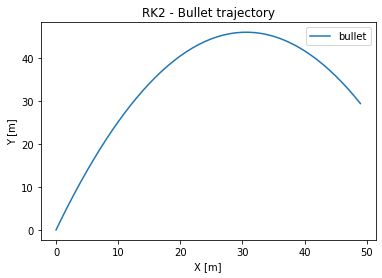

In [12]:
import matplotlib.pyplot as plt
# make 2D Plot
fig = plt.figure()

plt.title('RK2 - Bullet trajectory')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.plot(xt, yt, linestyle = 'solid', label = 'bullet')
plt.legend(loc = "upper right")

#（例）a[::5] 配列aから5個に一つずつ取り出す
#plt.plot(xt[::5], yt[::5], 'o') 

plt.show()

fig.savefig("bullet.png")

# ToDoリスト
- [ ] ToDo-1 初期速度を(u0,v0)=(10,10)の場合を描こう。
- [ ] ToDo-2 1秒ごとに●マーカーを描こう。
- [ ] ToDo-3 上記のpngファイルを保存しよう（→レポート提出）。